# Оптимизация производственных расходов, металлургического комбината «Стальная птица»

# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Ваша задача — построить модель, которая будет её предсказывать. 

Заказчик хочет использовать разработанную модель для имитации технологического процесса. 

# Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:

`data_arc_new.csv` — данные об электродах;
* key — номер партии;
*Начало нагрева дугой — время начала нагрева;
*Конец нагрева дугой — время окончания нагрева;
*Активная мощность — значение активной мощности;
*Реактивная мощность — значение реактивной мощности.

`data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
* key — номер партии;
*Bulk 1 … Bulk 15 — объём подаваемого материала.

`data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
* key — номер партии;
*Bulk 1 … Bulk 15 — время подачи материала.

`data_gas_new.csv` — данные о продувке сплава газом;
* key — номер партии;
*Газ 1 — объём подаваемого газа.

`data_temp_new.csv` — результаты измерения температуры;
* key — номер партии;
*Время замера — время замера;
*Температура — значение температуры.

`data_wire_new.csv` — данные о проволочных материалах (объём);
* key — номер партии;
*Wire 1 … Wire 9 — объём подаваемых проволочных материалов.

`data_wire_time_new.csv` — данные о проволочных материалах (время).
* key — номер партии;
*Wire 1 … Wire 9 — время подачи проволочных материалов.

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# План работы
**1. Загрузка данных**

Загрузите данные и выполните их первичный осмотр.

**2. Исследовательский анализ и предобработка данных**

Выполните исследовательский анализ каждого датафрейма и при необходимости выполните предобработку. Сделайте выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

**3. Объединение данных**

Объедините выбранные вами признаки в один датафрейм по ключу.

**4. Исследовательский анализ и предобработка данных объединённого датафрейма**

Выполните исследовательский анализ объединённого датафрейма, визуализируйте распределения признаков и при необходимости выполните предобработку. Проведите корреляционный анализ. Напоминаем, что вы можете использовать не только имеющиеся признаки, но и генерировать новые.

**5. Подготовка данных**

Выполните подготовку данных для обучения модели. Разделите данные на две выборки, при масштабировании и кодировании учитывайте особенности данных и моделей.

**6. Обучение моделей машинного обучения**

Обучите как минимум две модели. Хотя бы для одной из них подберите как минимум два гиперпараметра.

**7. Выбор лучшей модели**

Выберите лучшую модель и проверьте её качество на тестовой выборке.

**8. Общий вывод и рекомендации заказчику**

Сделайте общий вывод о проделанной работе: опишите основные этапы работы, полученные результаты и дайте рекомендации для бизнеса.

## Загрузка данных

Загрузите данные и выполните их первичный осмотр.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Подготовка данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Пайплайн
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Модели обучение
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# импорт класса дамми-модели 
from sklearn.dummy import DummyRegressor

# Метрики
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

RANDOM_STATE  = 141024

### данные об электродах — `data_arc_new`

In [2]:
data_arc = pd.read_csv('/datasets/data_arc_new.csv', parse_dates=[1,2])
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [3]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 14876 entries, 0 to 14875
,Data columns (total 5 columns):
, #   Column                Non-Null Count  Dtype         
,---  ------                --------------  -----         
, 0   key                   14876 non-null  int64         
, 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
, 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
, 3   Активная мощность     14876 non-null  float64       
, 4   Реактивная мощность   14876 non-null  float64       
,dtypes: datetime64[ns](2), float64(2), int64(1)
,memory usage: 581.2 KB


In [4]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [5]:
data_arc.key.value_counts(ascending=False).head()

2108    16
1689    15
1513    15
2567    14
46      13
Name: key, dtype: int64

In [6]:
pd.DataFrame(data_arc.isna().mean()*100, columns=['Пропуски, %']).style.background_gradient('coolwarm')

,"Пропуски, %"
key,0.000000
Начало нагрева дугой,0.000000
Конец нагрева дугой,0.000000
Активная мощность,0.000000
Реактивная мощность,0.000000


**Вывод:**
* Пропусков нет
* Значения `key` повторяются, что говорит о итеративном процессе легирования, для достижения целевого химического состава
* Реактивная мощность имеет аномальное значение -715

### Данные о подаче сыпучих материалов (объём) — `data_bulk_new.csv`

In [7]:
data_bulk_volume = pd.read_csv('/datasets/data_bulk_new.csv')
data_bulk_volume.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [8]:
data_bulk_volume.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 3129 entries, 0 to 3128
,Data columns (total 16 columns):
, #   Column   Non-Null Count  Dtype  
,---  ------   --------------  -----  
, 0   key      3129 non-null   int64  
, 1   Bulk 1   252 non-null    float64
, 2   Bulk 2   22 non-null     float64
, 3   Bulk 3   1298 non-null   float64
, 4   Bulk 4   1014 non-null   float64
, 5   Bulk 5   77 non-null     float64
, 6   Bulk 6   576 non-null    float64
, 7   Bulk 7   25 non-null     float64
, 8   Bulk 8   1 non-null      float64
, 9   Bulk 9   19 non-null     float64
, 10  Bulk 10  176 non-null    float64
, 11  Bulk 11  177 non-null    float64
, 12  Bulk 12  2450 non-null   float64
, 13  Bulk 13  18 non-null     float64
, 14  Bulk 14  2806 non-null   float64
, 15  Bulk 15  2248 non-null   float64
,dtypes: float64(15), int64(1)
,memory usage: 391.2 KB


In [9]:
# Транспонирую таблицу для более удобного чтения
data_bulk_volume.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3129.0,1624.383509,933.337642,1.0,816.00,1622.0,2431.00,3241.0
Bulk 1,252.0,39.242063,18.277654,10.0,27.00,31.0,46.00,185.0
Bulk 2,22.0,253.045455,21.180578,228.0,242.00,251.5,257.75,325.0
Bulk 3,1298.0,113.879045,75.483494,6.0,58.00,97.5,152.00,454.0
Bulk 4,1014.0,104.394477,48.184126,12.0,72.00,102.0,133.00,281.0
Bulk 5,77.0,107.025974,81.790646,11.0,70.00,86.0,132.00,603.0
Bulk 6,576.0,118.925347,72.057776,17.0,69.75,100.0,157.00,503.0
Bulk 7,25.0,305.600000,191.022904,47.0,155.00,298.0,406.00,772.0
Bulk 8,1.0,49.000000,NaN,49.0,49.00,49.0,49.00,49.0
Bulk 9,19.0,76.315789,21.720581,63.0,66.00,68.0,70.50,147.0


In [10]:
data_bulk_volume.key.value_counts(ascending=False).head()

2049    1
2612    1
2588    1
541     1
2590    1
Name: key, dtype: int64

In [11]:
bulk_v_mean = pd.DataFrame(data_bulk_volume.isna().mean()*100, columns=['Пропуски объём, %'])
bulk_v_mean.style.background_gradient('coolwarm')

,"Пропуски объём, %"
key,0.000000
Bulk 1,91.946309
Bulk 2,99.296900
Bulk 3,58.517098
Bulk 4,67.593480
Bulk 5,97.539150
Bulk 6,81.591563
Bulk 7,99.201023
Bulk 8,99.968041
Bulk 9,99.392777


**Вывод:**
* Имеются пропуски в каждом `Bulk(n)` объёме подоваемого материала
* Значения `key` номера партии не повторяются
* `Bulk 8` был только в одной единственной партии

### Данные о подаче сыпучих материалов (время) — `data_bulk_time_new.csv`

In [12]:
data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv', parse_dates=[i for i in range(1,16)])
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47


In [13]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 3129 entries, 0 to 3128
,Data columns (total 16 columns):
, #   Column   Non-Null Count  Dtype         
,---  ------   --------------  -----         
, 0   key      3129 non-null   int64         
, 1   Bulk 1   252 non-null    datetime64[ns]
, 2   Bulk 2   22 non-null     datetime64[ns]
, 3   Bulk 3   1298 non-null   datetime64[ns]
, 4   Bulk 4   1014 non-null   datetime64[ns]
, 5   Bulk 5   77 non-null     datetime64[ns]
, 6   Bulk 6   576 non-null    datetime64[ns]
, 7   Bulk 7   25 non-null     datetime64[ns]
, 8   Bulk 8   1 non-null      datetime64[ns]
, 9   Bulk 9   19 non-null     datetime64[ns]
, 10  Bulk 10  176 non-null    datetime64[ns]
, 11  Bulk 11  177 non-null    datetime64[ns]
, 12  Bulk 12  2450 non-null   datetime64[ns]
, 13  Bulk 13  18 non-null     datetime64[ns]
, 14  Bulk 14  2806 non-null   datetime64[ns]
, 15  Bulk 15  2248 non-null   datetime64[ns]
,dtypes: datetime64[ns](15), int64(1)
,memory usage: 391.2 KB


In [14]:
data_bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [15]:
bulk_t_mean = pd.DataFrame(data_bulk_time.isna().mean()*100, columns=['Пропуски время, %'])
bulk_t_mean.style.background_gradient('coolwarm')

,"Пропуски время, %"
key,0.000000
Bulk 1,91.946309
Bulk 2,99.296900
Bulk 3,58.517098
Bulk 4,67.593480
Bulk 5,97.539150
Bulk 6,81.591563
Bulk 7,99.201023
Bulk 8,99.968041
Bulk 9,99.392777


In [16]:
bulk_mean = bulk_v_mean.join(bulk_t_mean)
bulk_mean['Разность пропусков'] = bulk_mean['Пропуски объём, %'] - bulk_mean['Пропуски время, %']
bulk_mean.style.background_gradient('coolwarm')

,"Пропуски объём, %","Пропуски время, %",Разность пропусков
key,0.000000,0.000000,0.000000
Bulk 1,91.946309,91.946309,0.000000
Bulk 2,99.296900,99.296900,0.000000
Bulk 3,58.517098,58.517098,0.000000
Bulk 4,67.593480,67.593480,0.000000
Bulk 5,97.539150,97.539150,0.000000
Bulk 6,81.591563,81.591563,0.000000
Bulk 7,99.201023,99.201023,0.000000
Bulk 8,99.968041,99.968041,0.000000
Bulk 9,99.392777,99.392777,0.000000


In [17]:
del bulk_mean, bulk_v_mean, bulk_t_mean

**Вывод:**
* Имеются пропуски в каждом `Bulk(n)` объёме подоваемого материала
* Значения `key` номера партии не повторяются
* `Bulk 8` был только в одной единственной партии
* Количество пропусков в 2 датасетах `Bulk (volume/time)` идентичны, значит случайных пропусков в них не было

### Данные о продувке сплава газом — `data_gas_new.csv`

In [18]:
data_gas = pd.read_csv('/datasets/data_gas_new.csv')
data_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [19]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 3239 entries, 0 to 3238
,Data columns (total 2 columns):
, #   Column  Non-Null Count  Dtype  
,---  ------  --------------  -----  
, 0   key     3239 non-null   int64  
, 1   Газ 1   3239 non-null   float64
,dtypes: float64(1), int64(1)
,memory usage: 50.7 KB


In [20]:
data_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [21]:
data_gas.key.value_counts(ascending=False).head()

2049    1
3135    1
3115    1
1070    1
3119    1
Name: key, dtype: int64

In [22]:
pd.DataFrame(data_gas.isna().mean()*100, columns=['Пропуски, %']).style.background_gradient('coolwarm')

,"Пропуски, %"
key,0.000000
Газ 1,0.000000


**Вывод:**
* Пропуски отсутствуют
* Значения `key` номера партии не повторяются
* Средний объём подаваемого газа равен 11

### Данные о результатах измерения температуры — `data_temp_new.csv`

In [23]:
data_temp = pd.read_csv('/datasets/data_temp_new.csv', parse_dates=[1])
data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [24]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 18092 entries, 0 to 18091
,Data columns (total 3 columns):
, #   Column        Non-Null Count  Dtype         
,---  ------        --------------  -----         
, 0   key           18092 non-null  int64         
, 1   Время замера  18092 non-null  datetime64[ns]
, 2   Температура   14665 non-null  float64       
,dtypes: datetime64[ns](1), float64(1), int64(1)
,memory usage: 424.2 KB


In [25]:
data_temp.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


In [26]:
display(data_temp.key.value_counts(ascending=True).head())
data_temp.key.value_counts().head()

195     1
279     1
732     2
943     2
1988    2
Name: key, dtype: int64

2108    17
1513    16
1689    16
2567    15
322     14
Name: key, dtype: int64

In [27]:
pd.DataFrame(data_temp.isna().mean()*100, columns=['Пропуски, %']).style.background_gradient('coolwarm')

,"Пропуски, %"
key,0.000000
Время замера,0.000000
Температура,18.942074


**Вывод:**
* Есть пропуски в 18.95% данных
* Значения `key` номера партии повтаряются, однако есть значения с одним замером
* Средняя температура 1590 градусов
* Есть низкие температуры < 1500 градусов

### Данные о проволочных материалах (объём) — `data_wire_new.csv`

In [28]:
data_wire_volume = pd.read_csv('/datasets/data_wire_new.csv')
data_wire_volume.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_wire_volume.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 3081 entries, 0 to 3080
,Data columns (total 10 columns):
, #   Column  Non-Null Count  Dtype  
,---  ------  --------------  -----  
, 0   key     3081 non-null   int64  
, 1   Wire 1  3055 non-null   float64
, 2   Wire 2  1079 non-null   float64
, 3   Wire 3  63 non-null     float64
, 4   Wire 4  14 non-null     float64
, 5   Wire 5  1 non-null      float64
, 6   Wire 6  73 non-null     float64
, 7   Wire 7  11 non-null     float64
, 8   Wire 8  19 non-null     float64
, 9   Wire 9  29 non-null     float64
,dtypes: float64(9), int64(1)
,memory usage: 240.8 KB


In [30]:
data_wire_volume.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3081.0,1623.426485,932.996726,1.000000,823.000000,1619.000000,2434.000000,3241.000000
Wire 1,3055.0,100.895853,42.012518,1.918800,72.115684,100.158234,126.060483,330.314424
Wire 2,1079.0,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.0,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.0,57.442841,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.0,15.132000,NaN,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.0,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.0,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.0,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.0,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


In [31]:
data_wire_volume.key.value_counts().head()

2049    1
2664    1
2590    1
543     1
2592    1
Name: key, dtype: int64

In [32]:
wire_v_mean = pd.DataFrame(data_wire_volume.isna().mean()*100, columns=['Пропуски объём, %'])
wire_v_mean.style.background_gradient('coolwarm')

,"Пропуски объём, %"
key,0.000000
Wire 1,0.843882
Wire 2,64.978903
Wire 3,97.955209
Wire 4,99.545602
Wire 5,99.967543
Wire 6,97.630639
Wire 7,99.642973
Wire 8,99.383317
Wire 9,99.058747


**Вывод:**
* Имеются пропуски в каждом `Wire(n)` объёме подоваемого проволочного материала
* Значения `key` номера партии не повторяются
* `Wire 5` был только в одной единственной партии

### Данные о проволочных материалах (время) — `data_wire_time_new.csv`

In [33]:
data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv', parse_dates=[i for i in range(1,10)])
data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [34]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 3081 entries, 0 to 3080
,Data columns (total 10 columns):
, #   Column  Non-Null Count  Dtype         
,---  ------  --------------  -----         
, 0   key     3081 non-null   int64         
, 1   Wire 1  3055 non-null   datetime64[ns]
, 2   Wire 2  1079 non-null   datetime64[ns]
, 3   Wire 3  63 non-null     datetime64[ns]
, 4   Wire 4  14 non-null     datetime64[ns]
, 5   Wire 5  1 non-null      datetime64[ns]
, 6   Wire 6  73 non-null     datetime64[ns]
, 7   Wire 7  11 non-null     datetime64[ns]
, 8   Wire 8  19 non-null     datetime64[ns]
, 9   Wire 9  29 non-null     datetime64[ns]
,dtypes: datetime64[ns](9), int64(1)
,memory usage: 240.8 KB


In [35]:
data_wire_time.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [36]:
data_wire_time.key.value_counts().head()

2049    1
2664    1
2590    1
543     1
2592    1
Name: key, dtype: int64

In [37]:
wire_t_mean = pd.DataFrame(data_wire_time.isna().mean()*100, columns=['Пропуски время, %'])
wire_t_mean.style.background_gradient('coolwarm')

,"Пропуски время, %"
key,0.000000
Wire 1,0.843882
Wire 2,64.978903
Wire 3,97.955209
Wire 4,99.545602
Wire 5,99.967543
Wire 6,97.630639
Wire 7,99.642973
Wire 8,99.383317
Wire 9,99.058747


In [38]:
wire_mean = wire_v_mean.join(wire_t_mean)
wire_mean['Разность пропусков'] = wire_mean['Пропуски объём, %'] - wire_mean['Пропуски время, %']
wire_mean.style.background_gradient('coolwarm')

,"Пропуски объём, %","Пропуски время, %",Разность пропусков
key,0.000000,0.000000,0.000000
Wire 1,0.843882,0.843882,0.000000
Wire 2,64.978903,64.978903,0.000000
Wire 3,97.955209,97.955209,0.000000
Wire 4,99.545602,99.545602,0.000000
Wire 5,99.967543,99.967543,0.000000
Wire 6,97.630639,97.630639,0.000000
Wire 7,99.642973,99.642973,0.000000
Wire 8,99.383317,99.383317,0.000000
Wire 9,99.058747,99.058747,0.000000


In [39]:
del wire_mean, wire_v_mean, wire_t_mean

**Вывод:**
* Имеются пропуски в каждом `Wire(n)` объёме подоваемого проволочного материала
* Значения `key` номера партии не повторяются
* `Wire 5` был только в одной единственной партии
* Количество пропусков в 2 датасетах `Wire (volume/time)` идентичны, значит случайных пропусков в них не было

## Исследовательский анализ и предобработка данных

Выполните исследовательский анализ каждого датафрейма и при необходимости выполните предобработку. Сделайте выводы об имеющихся признаках: понадобятся ли они для обучения моделей.


 ### Данные об электродах — `data_arc`

In [40]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [41]:
# Построение графиков гистограммы и ящика с усами
def hist_box(data):
    for i in data.drop('key', 1).select_dtypes(include='number').columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

        data[i].plot(kind='hist', ax=axes[0], bins=50)
        axes[0].set_title(f'Гистограмма распределения {i}')

        data[i].plot(kind='box', vert=False, ax=axes[1], rot=90)
        axes[1].set_title(f'Диаграмма размаха для {i}')
        plt.show()

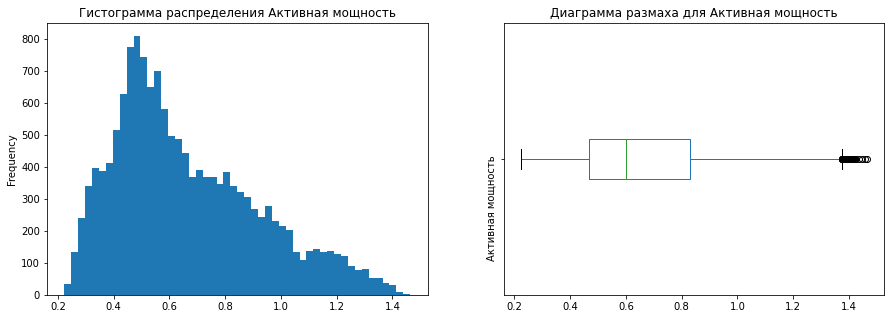

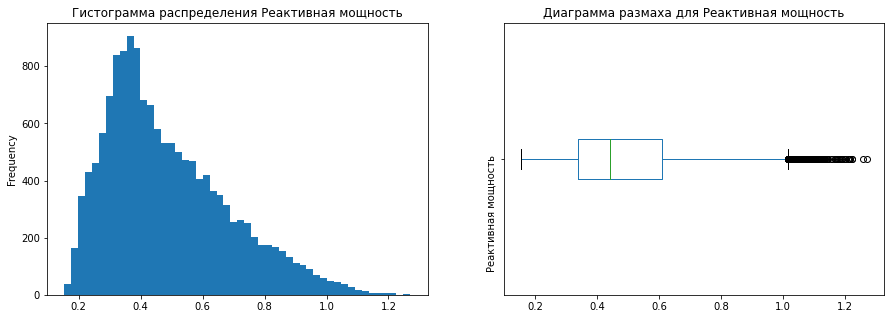

In [42]:
# Уберу анамальное отрицательное значение у реактивной мощности
data_arc = data_arc[data_arc['Реактивная мощность'] > 0]
hist_box(data_arc)

In [43]:
# Создадим столбец для проверки времени нагрева
data_arc['Время нагрева'] = data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']
data_arc.describe()

,key,Активная мощность,Реактивная мощность,Время нагрева
count,14875.000000,14875.000000,14875.000000,14875
mean,1615.186756,0.662749,0.487115,0 days 00:02:51.675159663
std,934.593897,0.258894,0.197612,0 days 00:01:38.188758501
min,1.000000,0.223120,0.153777,0 days 00:00:11
25%,806.000000,0.467115,0.337190,0 days 00:01:47
50%,1617.000000,0.599578,0.441665,0 days 00:02:27
75%,2429.000000,0.830135,0.608223,0 days 00:03:34
max,3241.000000,1.463773,1.270284,0 days 00:15:07


In [44]:
data_arc = data_arc.groupby('key').agg({
    'Активная мощность' : 'sum',
    'Реактивная мощность' : 'sum',
    'Время нагрева' : 'sum'
})
data_arc.head()

,Активная мощность,Реактивная мощность,Время нагрева
key,,,
1,3.036730,2.142821,0 days 00:18:18
2,2.139408,1.453357,0 days 00:13:31
3,4.063641,2.937457,0 days 00:10:55
4,2.706489,2.056992,0 days 00:12:21
5,2.252950,1.687991,0 days 00:14:29


**Найдём полную мощность, и из неё посчитаем затраченную электроэнергию**

In [45]:
data_arc['Время нагрева'] = data_arc['Время нагрева'].dt.total_seconds()
data_arc['Полная мощность'] = (data_arc['Активная мощность']**2 + data_arc['Реактивная мощность']**2)**(0.5)
data_arc['Затраты электроэнергии'] = data_arc['Полная мощность'] * data_arc['Время нагрева']

In [46]:
display(data_arc.head())
data_arc.describe()

,Активная мощность,Реактивная мощность,Время нагрева,Полная мощность,Затраты электроэнергии
key,,,,,
1,3.036730,2.142821,1098.0,3.716640,4080.870431
2,2.139408,1.453357,811.0,2.586371,2097.546600
3,4.063641,2.937457,655.0,5.014163,3284.276844
4,2.706489,2.056992,741.0,3.399456,2518.996645
5,2.252950,1.687991,869.0,2.815155,2446.369640


,Активная мощность,Реактивная мощность,Время нагрева,Полная мощность,Затраты электроэнергии
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,3.067329,2.254462,794.545115,3.807709,3373.485102
std,1.208697,0.894743,332.491076,1.501324,2824.354923
min,0.267676,0.196228,57.000000,0.331897,33.430208
25%,2.235394,1.630658,571.000000,2.774490,1660.229348
50%,2.984581,2.176833,770.000000,3.693107,2835.508950
75%,3.775472,2.788330,983.000000,4.692371,4340.808726
max,12.375636,8.949049,4189.000000,15.272257,63975.486018


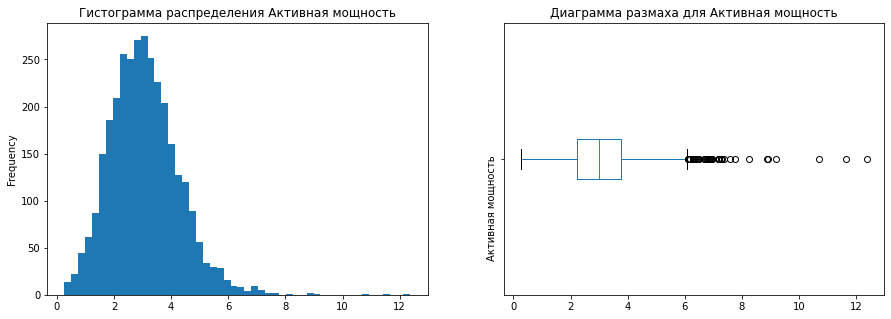

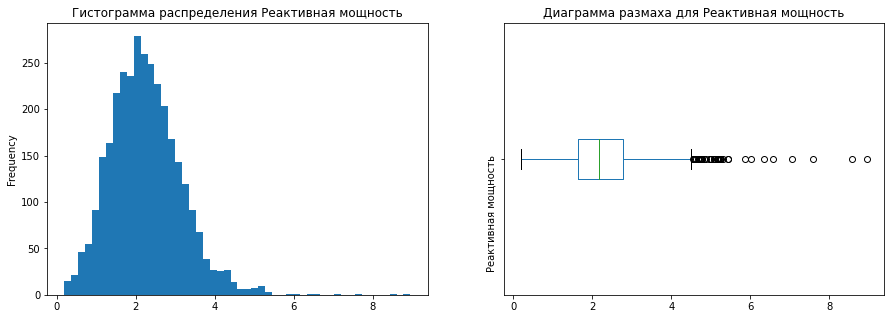

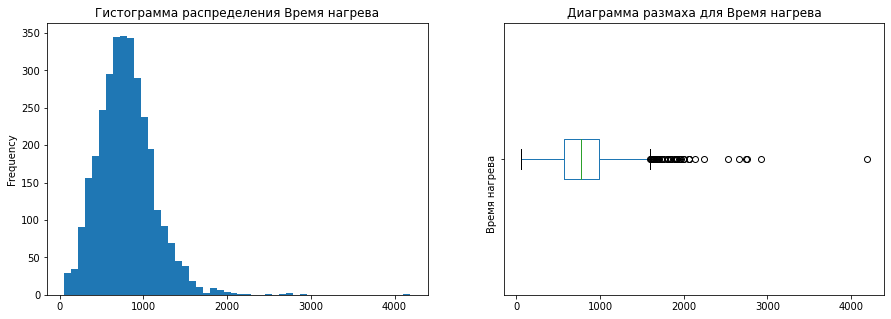

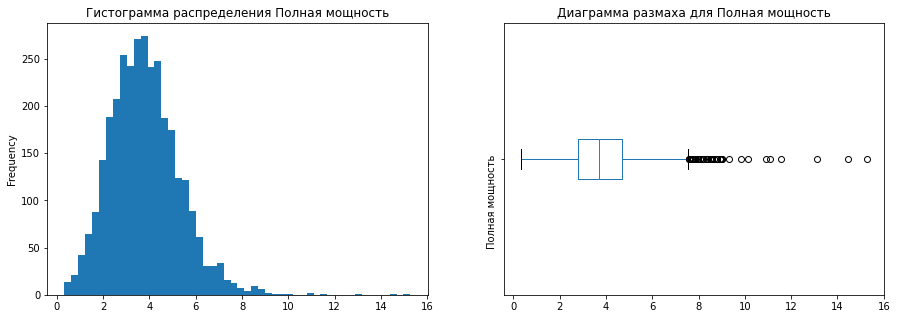

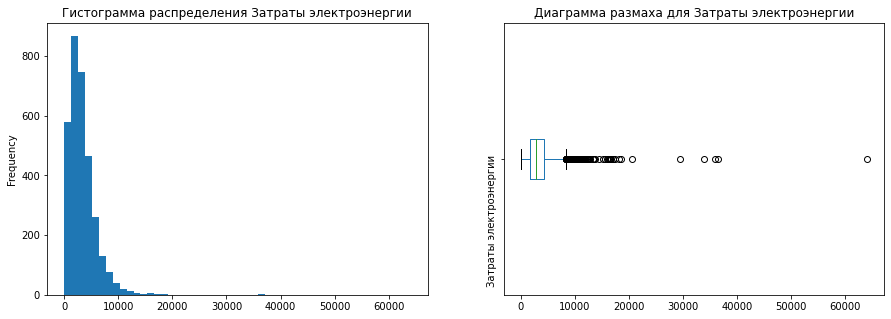

In [47]:
hist_box(data_arc.reset_index())

**Вывод:** 
* Среднее значение активной мощности = 3.06
* Среднее значение реактивной мощности = 2.25
* Аномально отрицательное значение в реактивной мощности было удалено

### Данные о подаче сыпучих материалов (объём) — `data_bulk_volume`

In [48]:
data_bulk_volume.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3129.0,1624.383509,933.337642,1.0,816.00,1622.0,2431.00,3241.0
Bulk 1,252.0,39.242063,18.277654,10.0,27.00,31.0,46.00,185.0
Bulk 2,22.0,253.045455,21.180578,228.0,242.00,251.5,257.75,325.0
Bulk 3,1298.0,113.879045,75.483494,6.0,58.00,97.5,152.00,454.0
Bulk 4,1014.0,104.394477,48.184126,12.0,72.00,102.0,133.00,281.0
Bulk 5,77.0,107.025974,81.790646,11.0,70.00,86.0,132.00,603.0
Bulk 6,576.0,118.925347,72.057776,17.0,69.75,100.0,157.00,503.0
Bulk 7,25.0,305.600000,191.022904,47.0,155.00,298.0,406.00,772.0
Bulk 8,1.0,49.000000,NaN,49.0,49.00,49.0,49.00,49.0
Bulk 9,19.0,76.315789,21.720581,63.0,66.00,68.0,70.50,147.0


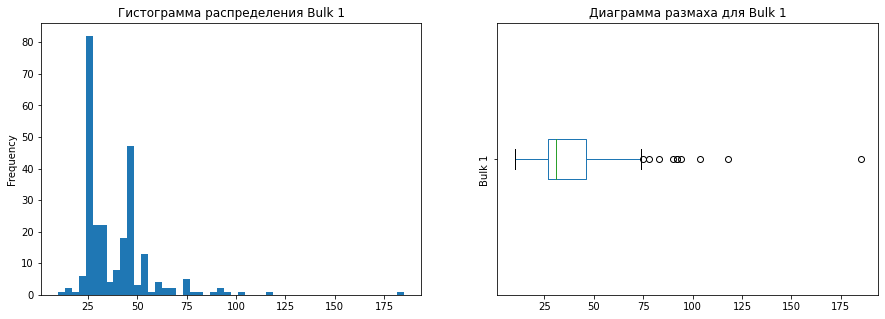

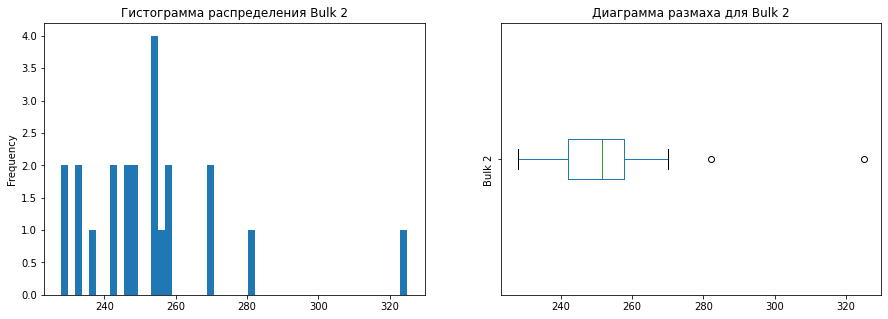

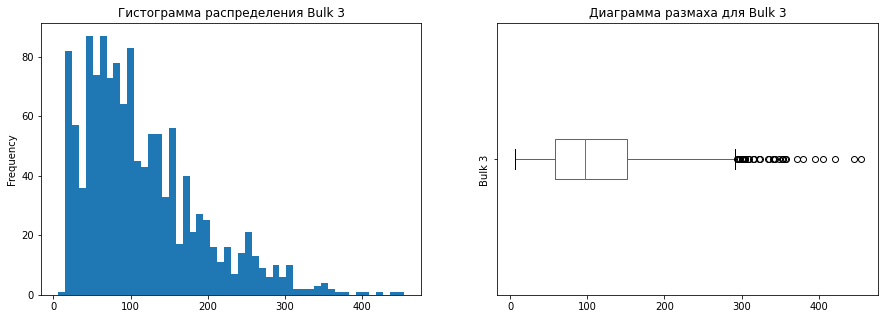

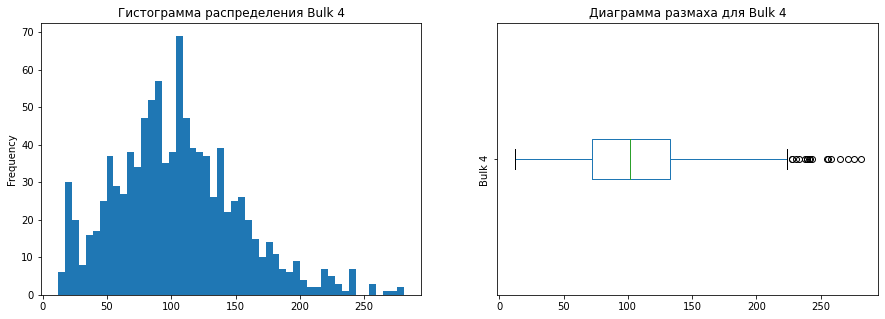

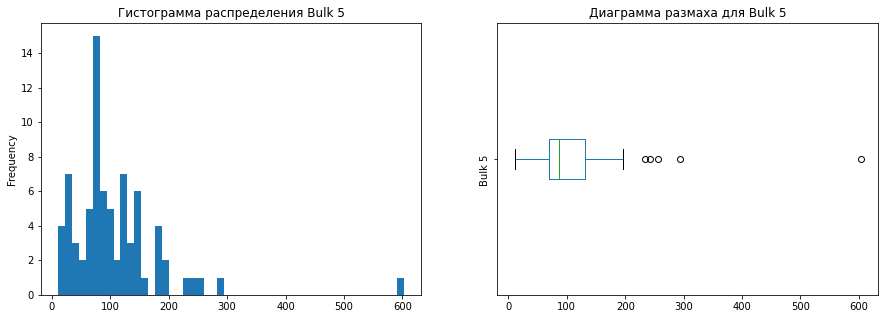

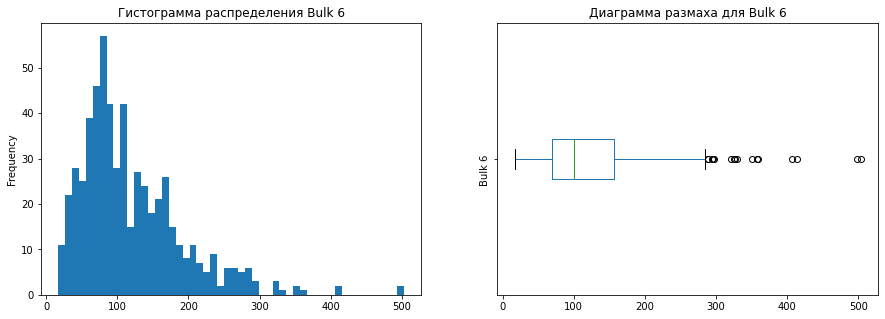

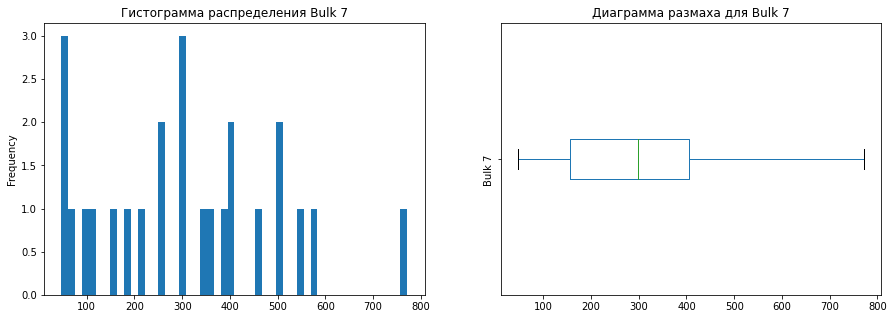

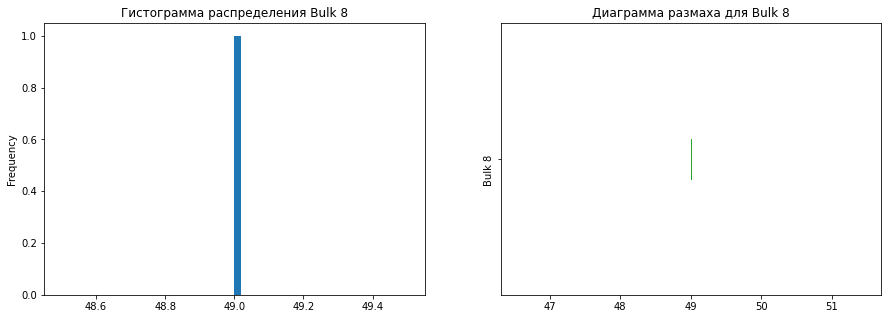

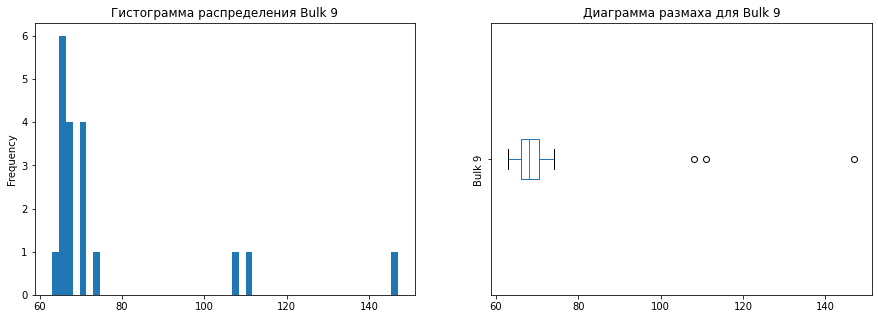

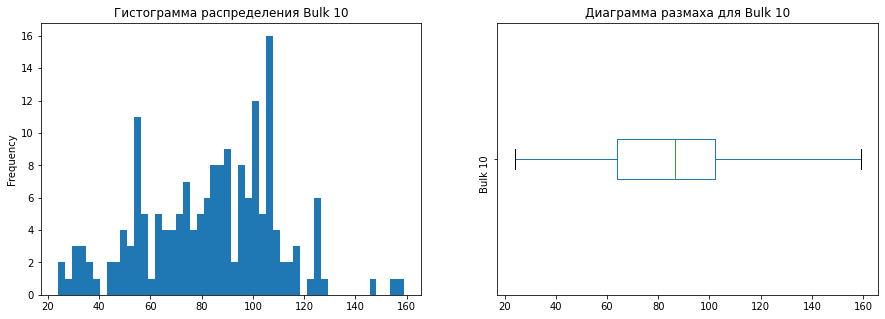

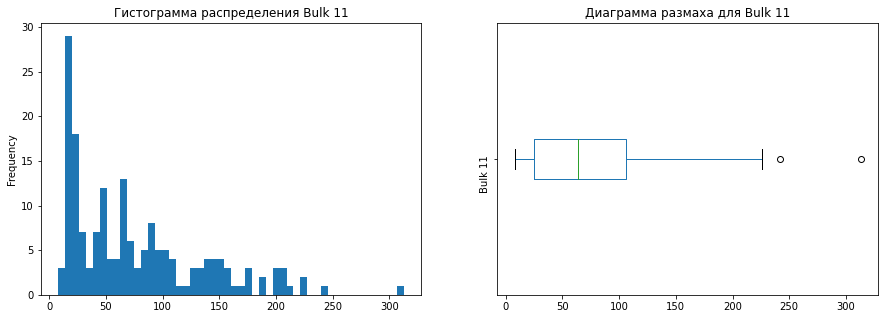

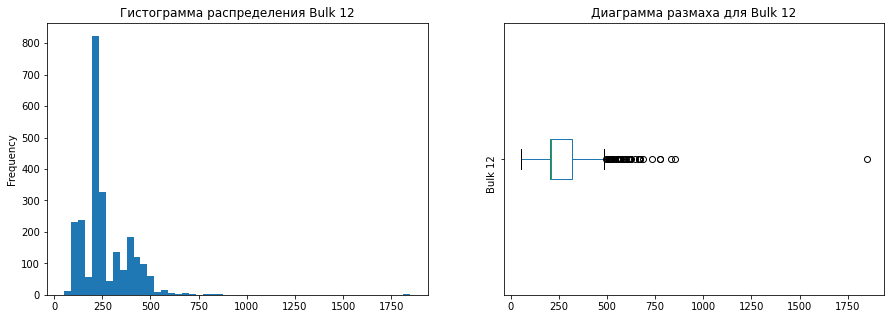

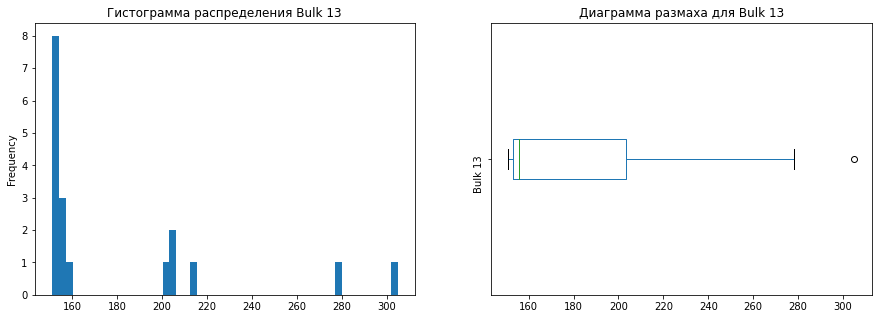

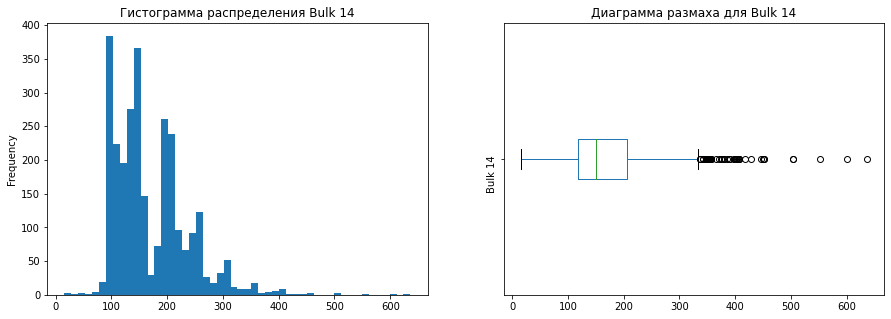

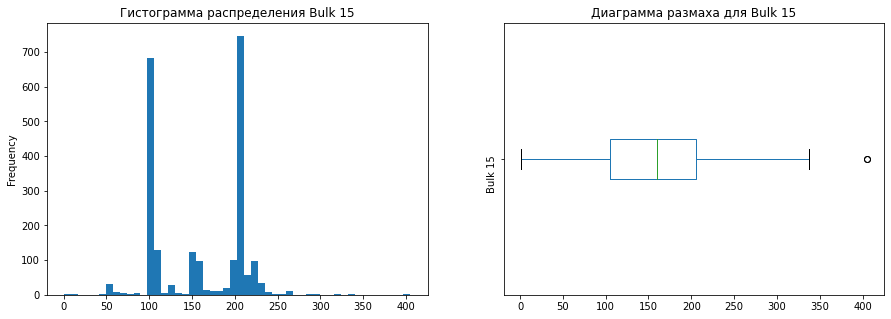

In [49]:
hist_box(data_bulk_volume)

In [50]:
pd.DataFrame(data_bulk_volume.isna().mean()*100, columns=['Пропуски, %']).style.background_gradient('coolwarm')

,"Пропуски, %"
key,0.000000
Bulk 1,91.946309
Bulk 2,99.296900
Bulk 3,58.517098
Bulk 4,67.593480
Bulk 5,97.539150
Bulk 6,81.591563
Bulk 7,99.201023
Bulk 8,99.968041
Bulk 9,99.392777


**Вывод:**
* Bulk(3-6) среднее значение от 100 до 120
* Наименьшее количество пропусков в Bulk (14, 12, 15)
* наибольшее количество пропусков в Bulk (2, 5, 7, 8, 9, 13)

### Данные о продувке сплава газом — `data_gas`

In [51]:
data_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


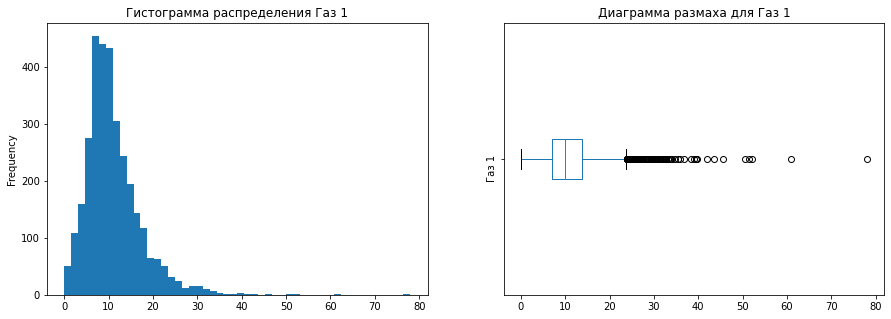

In [52]:
hist_box(data_gas)

**Вывод:**
* Межквартильный размах объёма подаваемого газа равен от 7.04 до 13.76
* Медианное значение 9.83
* Максимальное значение 77.99

### Данные о проволочных материалах (объём) — `data_wire_volume`

In [53]:
data_wire_volume.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3081.0,1623.426485,932.996726,1.000000,823.000000,1619.000000,2434.000000,3241.000000
Wire 1,3055.0,100.895853,42.012518,1.918800,72.115684,100.158234,126.060483,330.314424
Wire 2,1079.0,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.0,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.0,57.442841,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.0,15.132000,NaN,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.0,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.0,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.0,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.0,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


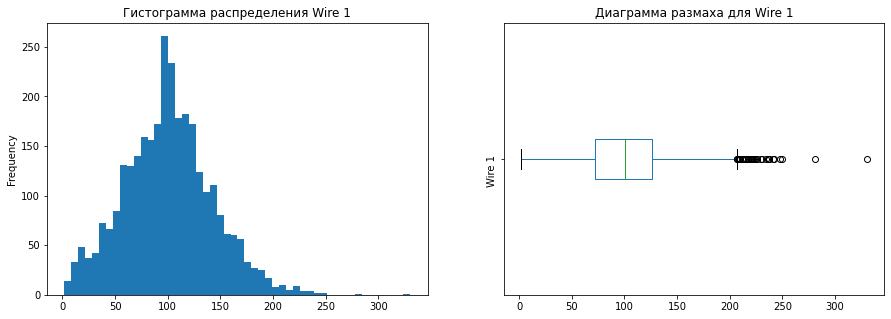

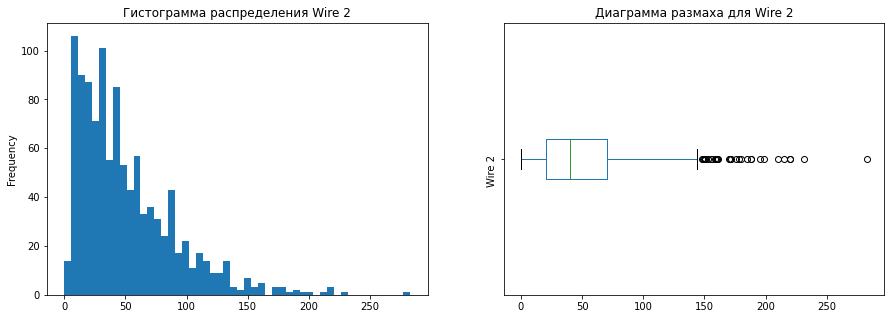

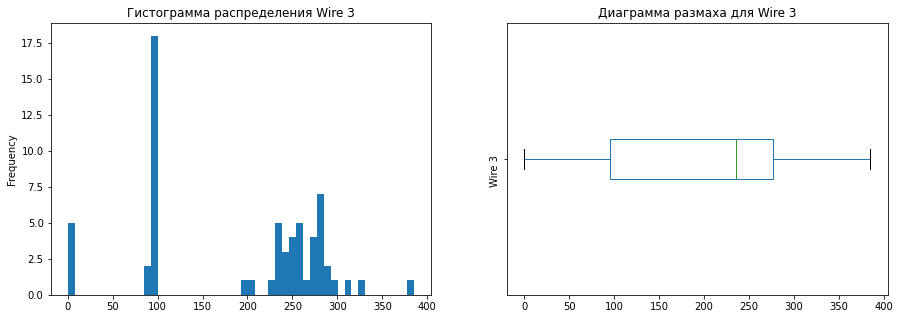

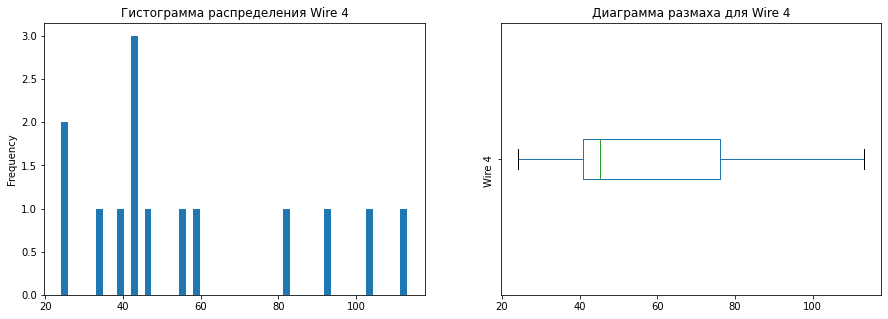

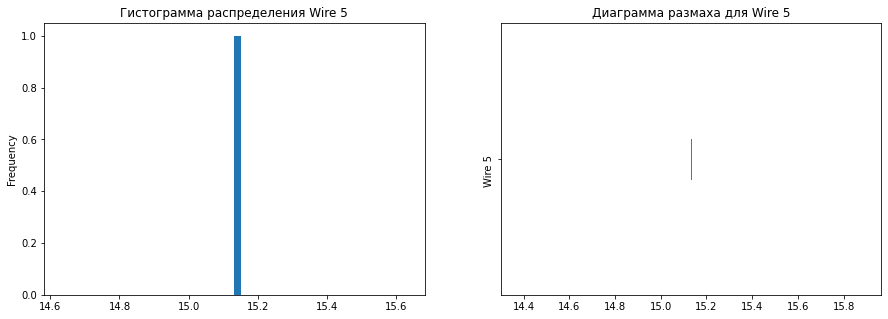

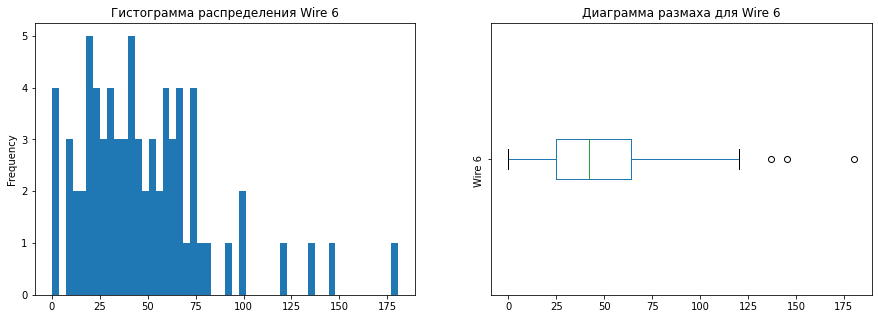

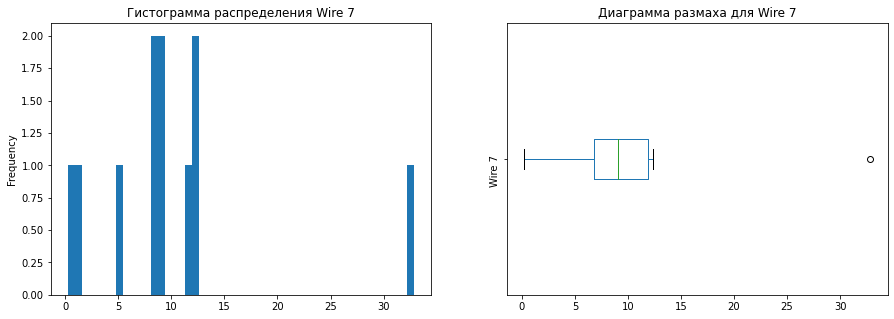

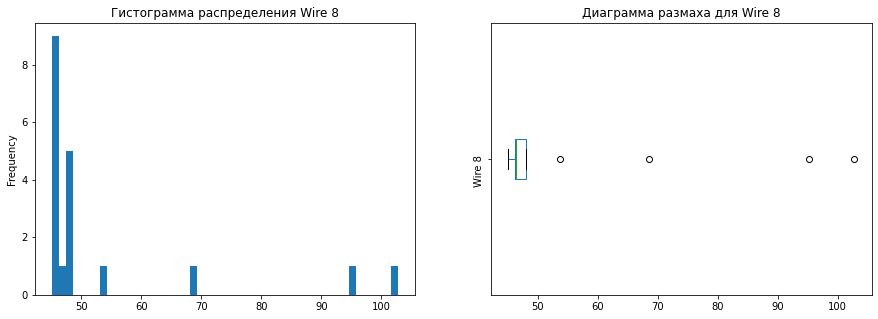

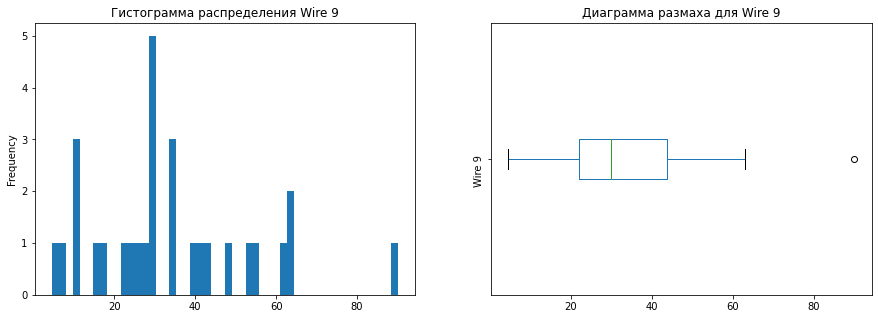

In [54]:
hist_box(data_wire_volume)

In [55]:
pd.DataFrame(data_wire_volume.isna().mean()*100, columns=['Пропуски, %']).style.background_gradient('coolwarm')

,"Пропуски, %"
key,0.000000
Wire 1,0.843882
Wire 2,64.978903
Wire 3,97.955209
Wire 4,99.545602
Wire 5,99.967543
Wire 6,97.630639
Wire 7,99.642973
Wire 8,99.383317
Wire 9,99.058747


**Вывод:**
* Wire(2, 6, 8) среднее значение от 48 до 53
* Наименьшее количество пропусков в Wire 1
* наибольшее количество пропусков в Wire (3-9)

### Данные о результатах измерения температуры —  `data_temp`

In [56]:
data_temp.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


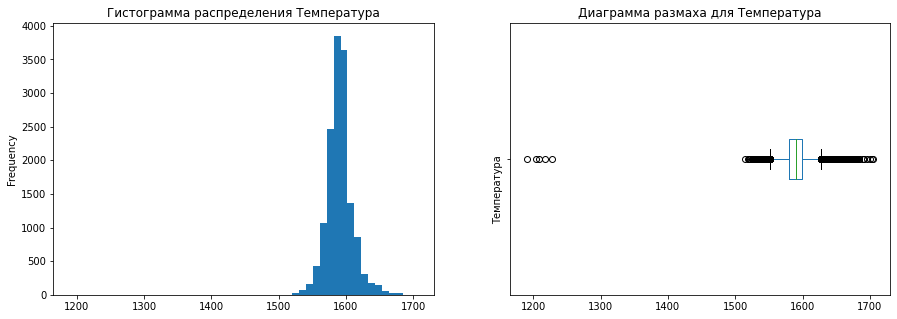

In [57]:
hist_box(data_temp)

In [58]:
# Удалим  ключи с одним замером температуры
print(data_temp.key.value_counts(ascending=True).head())
data_temp = data_temp[(data_temp.key != 195)]
data_temp = data_temp[(data_temp.key != 279)]

195     1
,279     1
,732     2
,943     2
,1988    2
,Name: key, dtype: int64


In [59]:
# Удалим все ключи с температурой ниже 1500
data_temp = data_temp[~data_temp.key.isin(data_temp[data_temp['Температура'] < 1500]['key'].to_list())]
data_temp[data_temp['Температура'] < 1500].head(10)

,key,Время замера,Температура


In [60]:
keys = list(data_temp[data_temp['Температура'].isna()]['key'].unique())
data_temp = data_temp[~ data_temp.key.isin(keys)]

In [61]:
data_temp = data_temp.drop('Время замера', 1)
data_temp = data_temp.groupby('key').agg(['first', 'last'])

In [62]:
data_temp

Температура        
           first    last
key                     
1         1571.0  1613.0
2         1581.0  1602.0
3         1596.0  1599.0
4         1601.0  1625.0
5         1576.0  1602.0
...          ...     ...
2495      1570.0  1591.0
2496      1554.0  1591.0
2497      1571.0  1589.0
2498      1591.0  1594.0
2499      1569.0  1603.0

[2471 rows x 2 columns]

In [63]:
data_temp.columns = ['temp_first', 'temp_last']
data_temp

,temp_first,temp_last
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
2495,1570.0,1591.0
2496,1554.0,1591.0
2497,1571.0,1589.0


**Вывод:**
* Средняя температура 1590
* Межквартильный размах температур равен от 1580 до 1599 градусов

### Отбор признаков

Необхадимо удалить признаки, в которых изначально имеется более 80% пропущеных данных

Пропуски заполняются нулями

In [64]:
data_bulk_volume.set_index('key', inplace=True)
data_bulk_volume.head()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [65]:
data_bulk_volume = data_bulk_volume[data_bulk_volume.columns[(data_bulk_volume.isna().mean() < 0.8)]]
data_bulk_volume.fillna(0, inplace=True)
data_bulk_volume.head()

,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
key,,,,,
1,0.0,43.0,206.0,150.0,154.0
2,0.0,73.0,206.0,149.0,154.0
3,0.0,34.0,205.0,152.0,153.0
4,0.0,81.0,207.0,153.0,154.0
5,0.0,78.0,203.0,151.0,152.0


In [66]:
data_wire_volume.set_index('key', inplace=True)
data_wire_volume.head()

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data_wire_volume = data_wire_volume[data_wire_volume.columns[(data_wire_volume.isna().mean() < 0.8)]]
data_wire_volume.fillna(0, inplace=True)
data_wire_volume.head()

,Wire 1,Wire 2
key,,
1,60.059998,0.00000
2,96.052315,0.00000
3,91.160157,0.00000
4,89.063515,0.00000
5,89.238236,9.11456


**Вывод:** После отбора признаков остались такие столбцы как:
* Данные о подаче сыпучих материалов `Bark (3, 4, 12, 14, 15)`
* Данные о проволочных материалах `Wire (1, 2)`

## Объединение данных

* Объедините выбранные вами признаки в один датафрейм по ключу.
* В объединёном датафрейме должно остаться не более 2332 ключа
* Не должно остаться ключей с номерами более чем 2500
* `key` Удалить после объединения

In [68]:
df = data_arc.join(data_bulk_volume)
df = df.join(data_gas.set_index('key'))
df = df.join(data_temp)
df = df.join(data_wire_volume)
df.dropna(inplace=True)
print('Размер датафрейма', df.shape)
display(df.tail())
df.reset_index(drop=True, inplace=True)

Размер датафрейма (2325, 15)


,Активная мощность,Реактивная мощность,Время нагрева,Полная мощность,Затраты электроэнергии,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15,Газ 1,temp_first,temp_last,Wire 1,Wire 2
key,,,,,,,,,,,,,,,
2495,3.168133,2.210936,723.0,3.863328,2793.186281,21.0,0.0,256.0,129.0,223.0,7.125735,1570.0,1591.0,89.150879,0.00000
2496,4.174918,2.872031,940.0,5.067396,4763.352254,0.0,63.0,256.0,129.0,226.0,9.412616,1554.0,1591.0,114.179527,0.00000
2497,3.605239,2.452092,569.0,4.360104,2480.898950,0.0,85.0,230.0,124.0,226.0,6.271699,1571.0,1589.0,94.086723,9.04800
2498,3.202310,2.239820,750.0,3.907887,2930.915458,90.0,0.0,206.0,129.0,207.0,14.953657,1591.0,1594.0,118.110717,0.00000
2499,1.737084,1.296836,883.0,2.167774,1914.144507,47.0,0.0,233.0,126.0,227.0,11.336151,1569.0,1603.0,110.160958,50.00528


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Активная мощность,2325.0,3.125813,1.220473,0.267676,2.295820,3.036303,3.834300,12.375636
Реактивная мощность,2325.0,2.300941,0.903664,0.196228,1.670519,2.225398,2.829159,8.949049
Время нагрева,2325.0,807.988387,340.888430,57.000000,581.000000,778.000000,993.000000,4189.000000
Полная мощность,2325.0,3.882376,1.516031,0.331897,2.841651,3.767272,4.767256,15.272257
Затраты электроэнергии,2325.0,3508.497740,3037.880151,33.430208,1708.595822,2902.393477,4511.394646,63975.486018
Bulk 3,2325.0,47.296774,75.228262,0.000000,0.000000,0.000000,80.000000,454.000000
Bulk 4,2325.0,37.331613,58.670377,0.000000,0.000000,0.000000,77.000000,281.000000
Bulk 12,2325.0,208.507957,157.137873,0.000000,105.000000,206.000000,283.000000,1849.000000
Bulk 14,2325.0,153.971613,81.398153,0.000000,105.000000,149.000000,204.000000,636.000000
Bulk 15,2325.0,120.026667,84.674380,0.000000,0.000000,107.000000,204.000000,405.000000


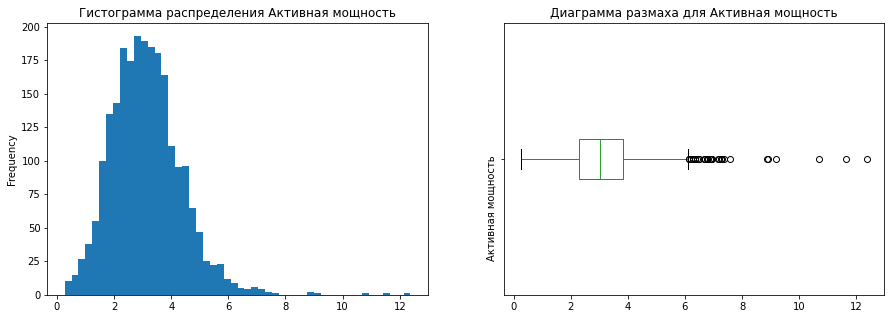

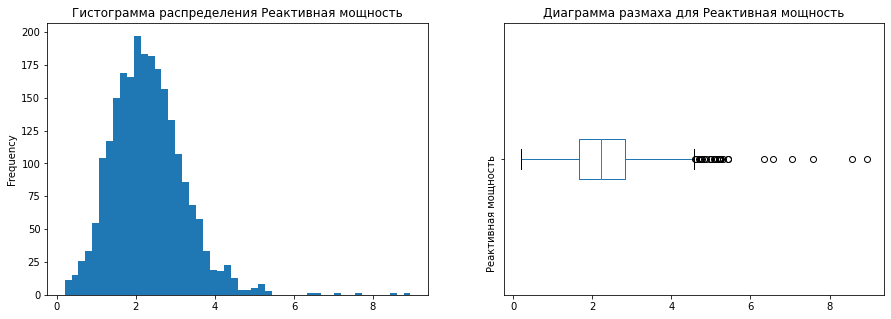

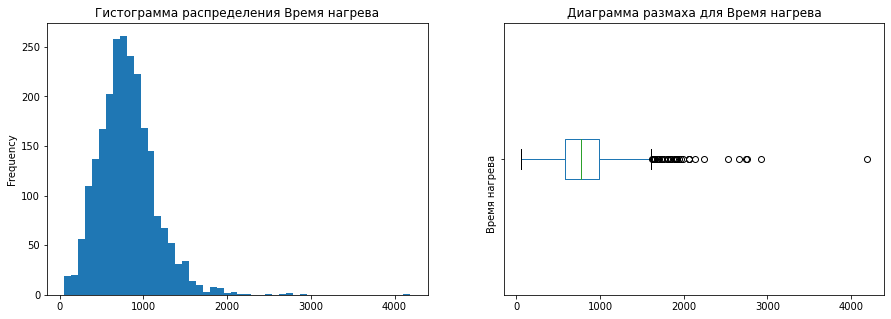

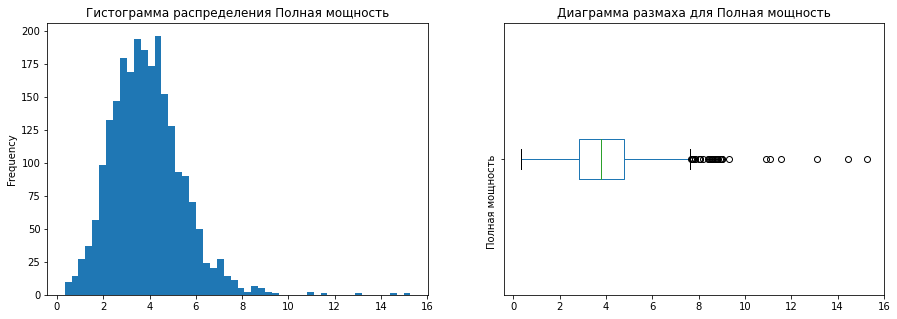

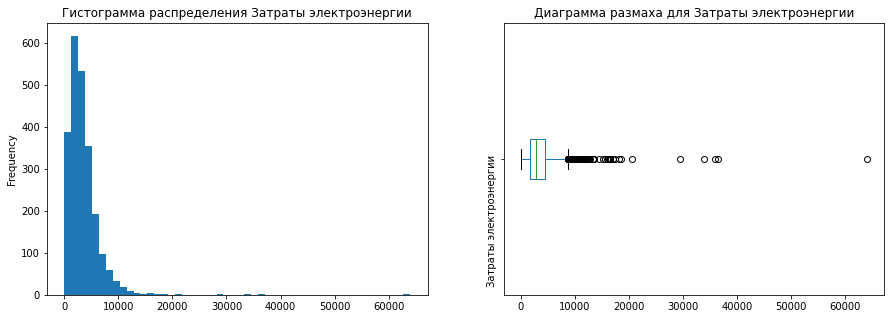

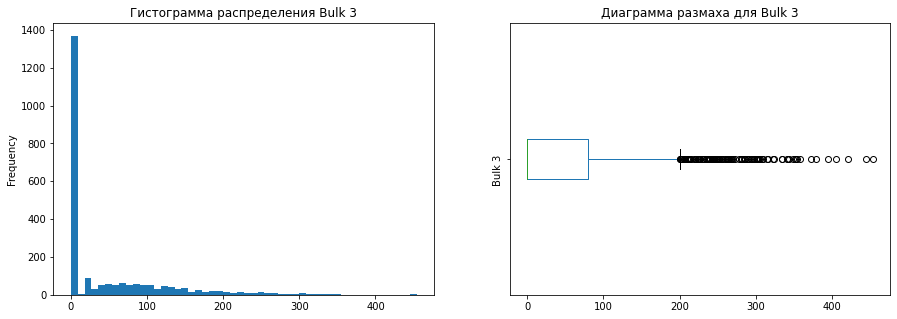

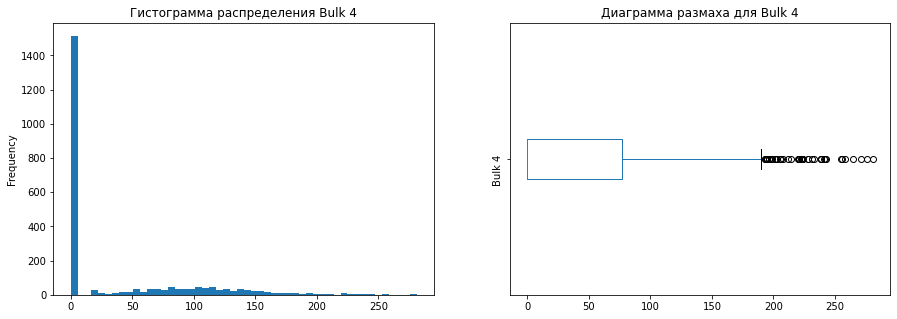

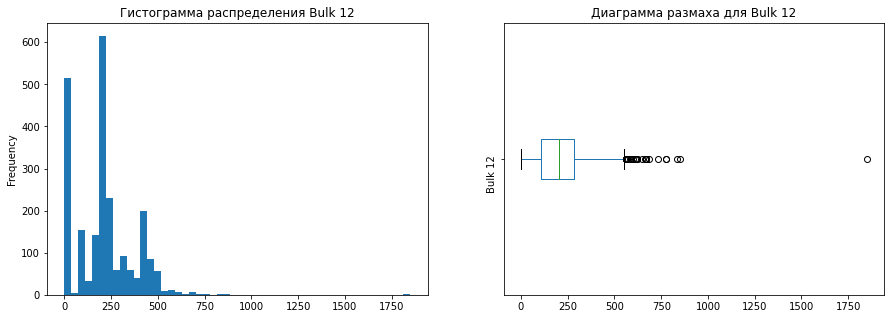

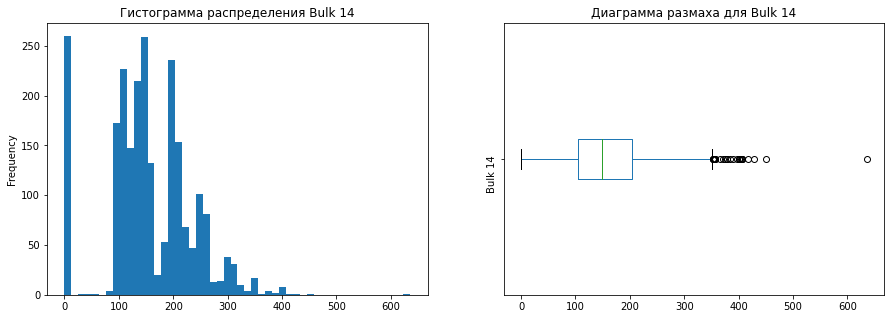

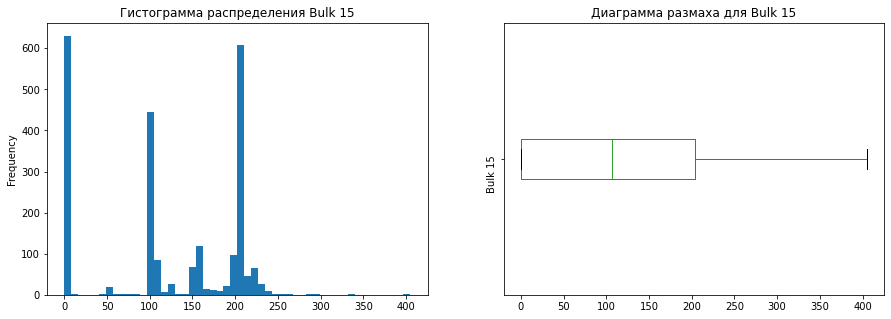

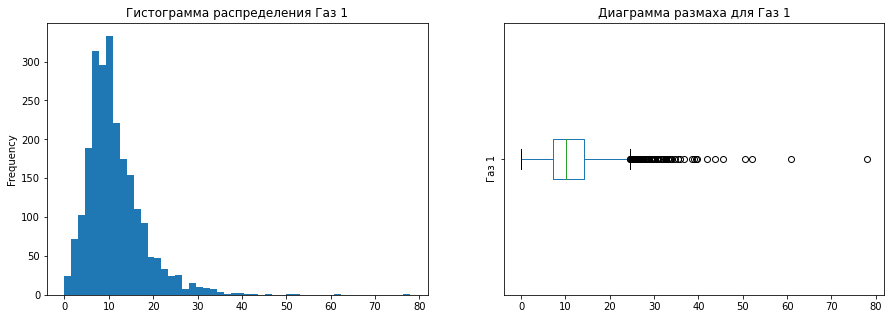

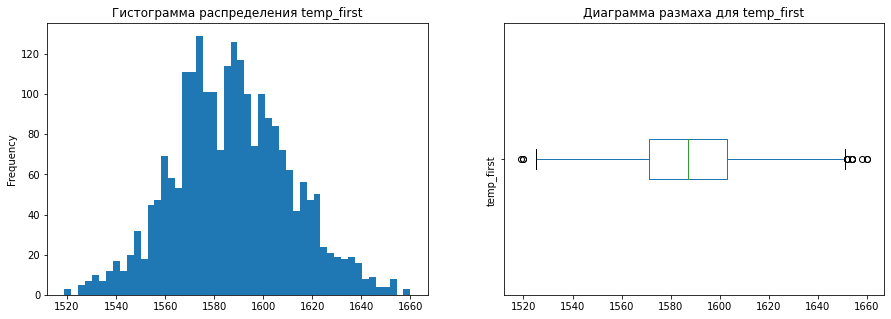

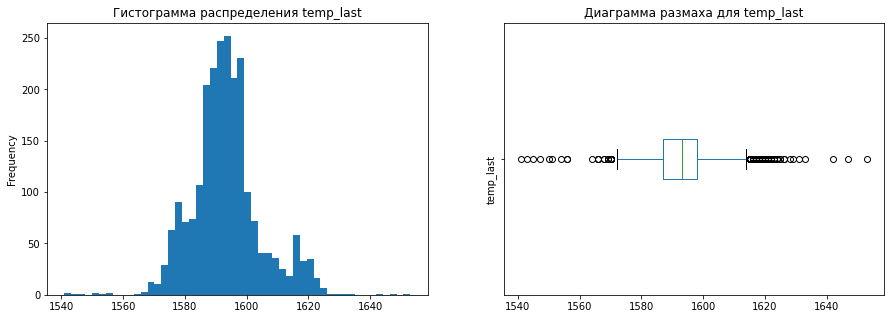

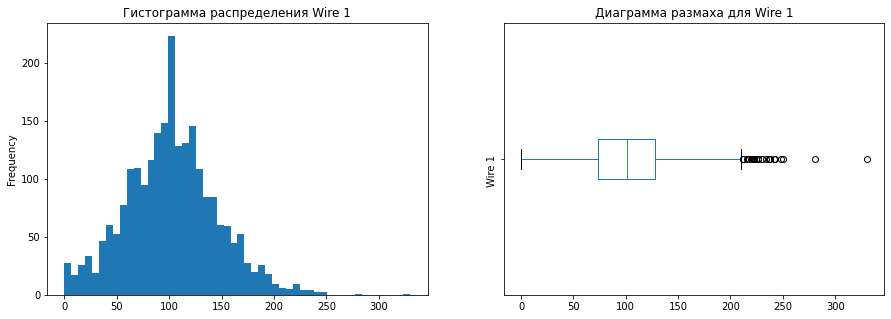

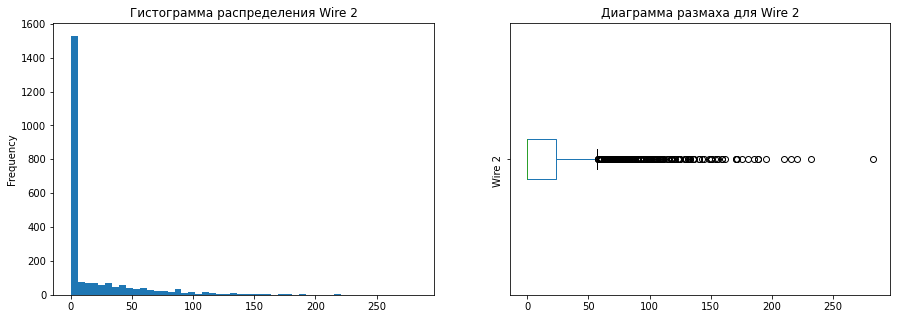

In [70]:
df['key'] = df.index
hist_box(df)
df = df.drop('key', 1)

**вывод:**
* Объединили датасеты по ключам
* Выполнилось условие, количество ключей не превышает 2332
* Выполнилось условие отсутствуют ключи с номерами более 2500
* После объединения остались толлько те признаки, которые несут полезную информацию
* Wire 2 медианна в значении 0, тк. мы обработали пропуски по условию указав на месте пропусков значение 0
* temp_firs средняя температура 1587 градуса
* temp_last средняя температура 1593 градуса

## Исследовательский анализ и предобработка данных объединённого датафрейма

Выполните исследовательский анализ объединённого датафрейма, визуализируйте распределения признаков и при необходимости выполните предобработку. Проведите корреляционный анализ. Напоминаем, что вы можете использовать не только имеющиеся признаки, но и генерировать новые.

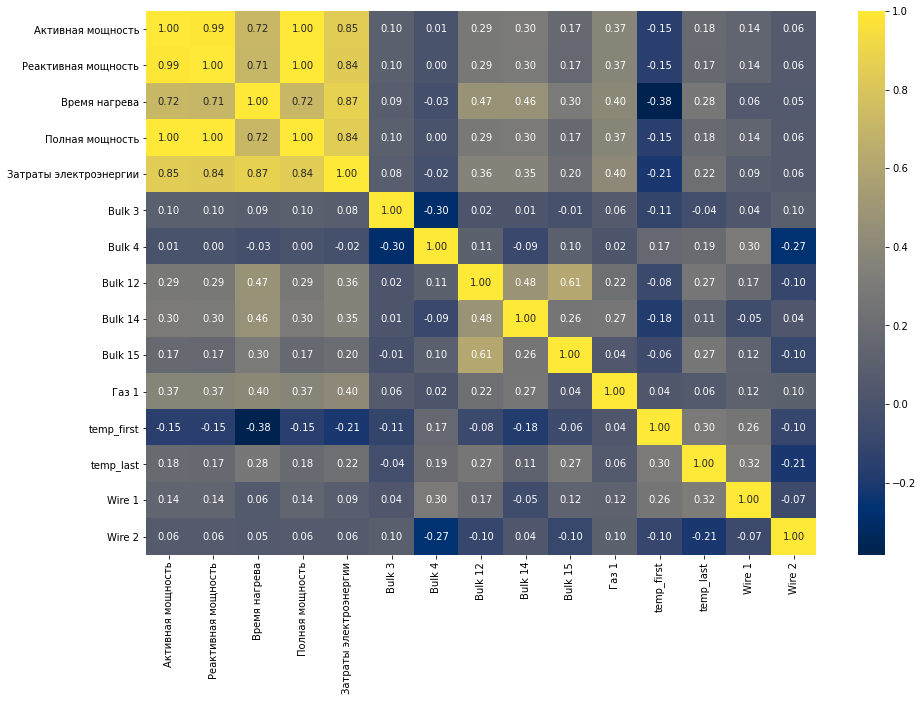

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='cividis')
plt.show()

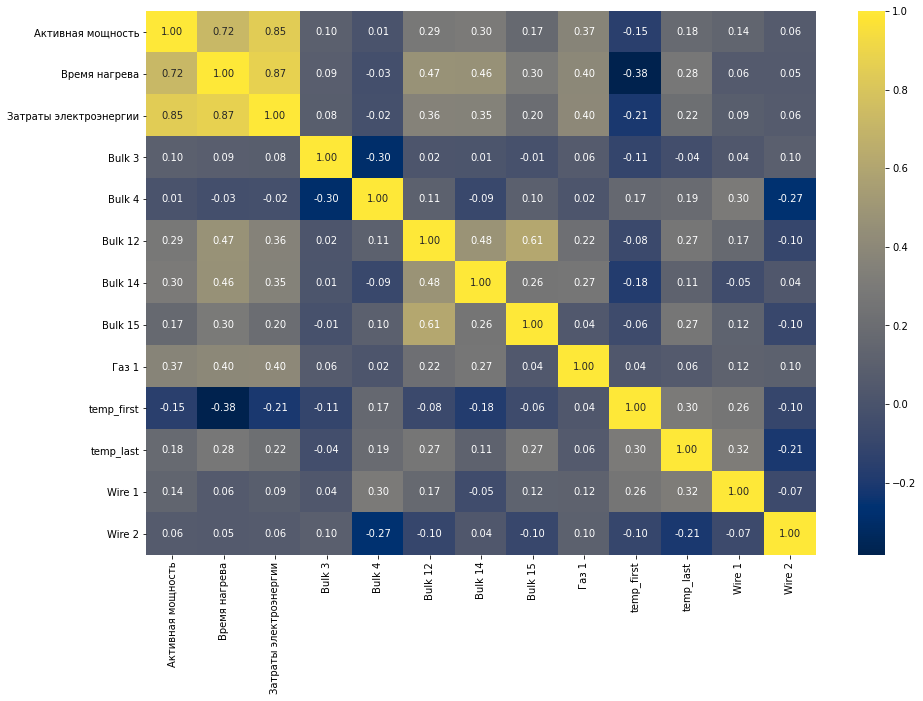

In [72]:
# Избавимся от мультиколлинеарности
df = df.drop(['Реактивная мощность', 'Полная мощность'], 1)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='cividis')
plt.show()

In [74]:
# Перед обучением моедли предлагаю поменять названия колонок
df.columns = ['active_power', 'heating_time', 'electricity_costs', 'bulk_3', 'bulk_4', \
              'bulk_12', 'bulk_14', 'bulk_15', 'gas', 'temp_first', 'temp_last', 'wire_1', 'wire_2']


**Вывод:**
* Убрали мультиколлинеарные признаки со значением выше 0.9 `Реактивная мощность, Полная мощность`
* С целевыым признаком `temp_last` имеет высокую корреляцию признак `temp_median`

## Подготовка данных

Выполните подготовку данных для обучения модели. Разделите данные на две выборки, при масштабировании и кодировании учитывайте особенности данных и моделей.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('temp_last', 1), df['temp_last'], 
                                                    random_state=RANDOM_STATE, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(1743, 12)
,(582, 12)
,
,(1743,)
,(582,)


In [76]:
# Масштабирую для DummyRegressor
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

**Вывод:**
* Разделили датасет на 2 выборки train, test в соотношении 3:1
* в обучающей выборке 1743 строки, в тестовой выборке 582 строки

## Обучение моделей машинного обучения

Обучите как минимум две модели. Хотя бы для одной из них подберите как минимум два гиперпараметра.

Тк. необходимо разделить тоько на 2 выборки данные, использую пайплайны, чтобы при CV небыло заглядываний в будущее

In [82]:
num_columns = X_train.columns.to_list()

###
data_preprocessor = ColumnTransformer(
    [
        ('scaler', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', RandomForestRegressor(random_state=RANDOM_STATE))
    ]
)
###

param_grid = [
    {
        'models': [RandomForestRegressor()],
        'models__n_estimators': [200, 300],
        'models__max_depth': [20, 30],
        'models__min_samples_split': [2, 3]
    },
    {
        'models': [CatBoostRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [200, 300],
        'models__max_depth': [8, 13],
        'models__learning_rate': [0.1, 0.15]
    }
]

In [83]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=2, 
    scoring='neg_mean_absolute_error'
)
grid.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', abs(grid.best_score_))

0:	learn: 11.0913156	total: 8.29ms	remaining: 1.65s
,1:	learn: 10.7913230	total: 16.3ms	remaining: 1.61s
,2:	learn: 10.5124575	total: 24.9ms	remaining: 1.64s
,3:	learn: 10.2662537	total: 33.1ms	remaining: 1.62s
,4:	learn: 10.0143433	total: 41.1ms	remaining: 1.6s
,5:	learn: 9.7945232	total: 48.8ms	remaining: 1.58s
,6:	learn: 9.5747491	total: 57.1ms	remaining: 1.57s
,7:	learn: 9.3864507	total: 65.1ms	remaining: 1.56s
,8:	learn: 9.2051743	total: 72.7ms	remaining: 1.54s
,9:	learn: 9.0576194	total: 80.7ms	remaining: 1.53s
,10:	learn: 8.8699594	total: 89ms	remaining: 1.53s
,11:	learn: 8.7097251	total: 97.5ms	remaining: 1.53s
,12:	learn: 8.5851753	total: 106ms	remaining: 1.53s
,13:	learn: 8.4725439	total: 115ms	remaining: 1.52s
,14:	learn: 8.3500220	total: 123ms	remaining: 1.51s
,15:	learn: 8.2157304	total: 131ms	remaining: 1.51s
,16:	learn: 8.1040236	total: 140ms	remaining: 1.5s
,17:	learn: 8.0223196	total: 147ms	remaining: 1.49s
,18:	learn: 7.9191399	total: 155ms	remaining: 1.48s
,19:	learn

**Вывод:**
* Наилучшей моделью оказалась `CatBoostRegressor`
* Значение MAE на тренировочных данных составила 6.63

## Выбор лучшей модели

Выберите лучшую модель и проверьте её качество на тестовой выборке.

Чтобы проект приняли МАЕ на тесте должно быть <= 6.8
### Тест лучшей модели

In [87]:
y_test_predict = grid.predict(X_test)

print(f'Метрика MAE на тестовой выборке: {mean_absolute_error(y_test, y_test_predict)}')
print(f'Метрика R2 на тестовой выборке: {r2_score(y_test, y_test_predict)}')

Метрика MAE на тестовой выборке: 6.346927994627661
,Метрика R2 на тестовой выборке: 0.3250178482683601


**Вывод:**
* Значение MAE на тестовых данных составила 6.34, что удовлетворяет условию
* R2 составила 32%, верно предсказанных значений, чем среднее значение целевого признака

### Проверка модели на адекватность

Сравним показатели лучшей модели с константной моделью DummyRegressor

In [88]:
dummy_reg = DummyRegressor().fit(X_train_scaler, y_train)
dummy_pred = dummy_reg.predict(X_test_scaler)
print(f'Метрика MAE на тестовой выборке: {mean_absolute_error(y_test, dummy_pred)}')
print(f'Метрика R2 на тестовой выборке: {r2_score(y_test, dummy_pred)}')

Метрика MAE на тестовой выборке: 7.656366260328497
,Метрика R2 на тестовой выборке: -0.0019239333396552372


**Вывод:**
* Значение MAE на тестовых данных составила 7.65, что неудовлетворяет условию
* R2 составила -0.002%, верно предсказанных значений, чем среднее значение целевого признака. Тем самым модель справляется, как если просто усреднить значения

### Важность признаков



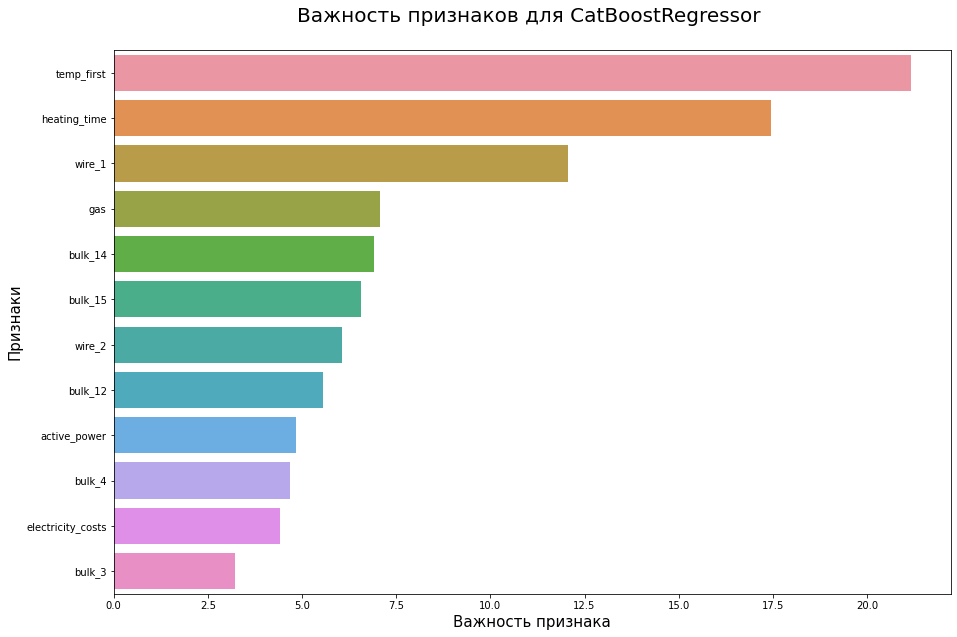

In [90]:
feature_models = pd.DataFrame({
    'Признаки': X_test.columns,
    'Важность признака': grid.best_estimator_['models'].feature_importances_,
})
feature_models.sort_values(by='Важность признака', ascending=False, inplace=True)
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_models['Важность признака'], y=feature_models['Признаки'])
plt.xlabel('Важность признака', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.title('Важность признаков для CatBoostRegressor \n', fontsize=20)
plt.show()

**Вывод:** 
* Наиболее значемые признаки `temp_median`, `heating_time`, `Wire 1`
* Наименее значимый признак `Bulk 3`

## Общий вывод и рекомендации заказчику

Сделайте общий вывод о проделанной работе: опишите основные этапы работы, полученные результаты и дайте рекомендации для бизнеса.

                                                      Вывод

**Предобработка данных** 

Во время предобработки данных было выявлено:
* Аномально отрицательное значение в реактивной мощности было удалено
* В данных о подаче сыпучих материалов содержали пропуски ниже 80% такие парамметры, как `bulk_3, bulk_4, bulk_12, bulk_14, bulk_15`
* в данных о проволочных материалах содержали пропуски ниже 80% такие парамметры, как `wire_1, wire_2`
* В данных о результатах измерения температуры, содержались пропуски в 18.95% данных, а также содержались значения всего с 1 измерением, и с температурами ниже 1500 градусов. Все ключи с аномальными данными были убраны из датасета

**Исследовательский анализ**

Во время исследовательского анализа данных было выявлено:
* Среднее значение активной мощности = 3.06. Среднее значение реактивной мощности = 2.25
* Средняя температура состовляет 1590 градусов. Межквартильный размах температур равен от 1580 до 1599 градусов
* Были добавлены новые признаки из них вошли в датасет `electricity_costs, temp_median, temp_first, temp_last - Целевой признак`. Для исключения мультиколлинеарности были удалены признаки `Реактивная мощность, Полная мощность - созданный признак`

**Обучение, тестирование модели**

Во время Обучение модели было выявлено:

* В качестве обучающих моделей использовались `RandomForestRegressor, CatBoostRegressor`
* Наилучшей оказалась модель `CatBoostRegressor` с такими паррамтрами, как `max_depth=8, n_estimators=200, learning_rate=0.1, random_state=141024 - Задан ментором)`
* Значение MAE на тренировочных данных составила 6.63

Во время тестирования модели было выявлено:

* Значение MAE на тестовых данных составила 6.34, что удовлетворяет условию и ниже значения 6.8
* Выполнено требованием заказчика, и дополнительно расчитано R2=35%, верно предсказанных значений, чем среднее значение целевого признака
* Дополнительно была обучена константная модель, с полученным MAE=7.65, как и следовало она не удовлетврояет требованию, однако можно заметить, что обученная модель `CatBoostRegressor` справилась лучше.

**Важность признаков и рекомендации заказчику**
* Наиболее значемые признаки `temp_median, heating_time, wire_1`
* Наименее значимый признак `Bulk 3`
* Необхадимо собрать больше данных, и проследить чтобы значения температуры, содержали больше одного измерения, и минимальное количество пропусков